In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 현재 사용 가능한 폰트 목록 확인
# import matplotlib.font_manager as fm
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(fm.FontProperties(fname=font).get_name()
          
# 운영체제에 맞는 기본 한글 폰트로
import matplotlib
matplotlib.rcParams['font.family']="AppleGothic"
matplotlib.rcParams['axes.unicode_minus']=False

In [66]:
data ={'eng':[10,30,50,70],
      'kor':[20,40,60,80],
      'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'])
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [3]:
df.max() # 컬럼별 max

eng     70
kor     80
math    90
dtype: int64

In [4]:
df.max(axis=1) #row별

a    90
b    50
c    60
d    80
dtype: int64

In [5]:
#모든 데이터 중 max
df.max().max()

90

In [6]:
# 2차원을 1차원인 시리즈로 변환
df.unstack()

eng   a    10
      b    30
      c    50
      d    70
kor   a    20
      b    40
      c    60
      d    80
math  a    90
      b    50
      c    20
      d    70
dtype: int64

In [8]:
# 멀티 인덱스
df.unstack().index

MultiIndex([( 'eng', 'a'),
            ( 'eng', 'b'),
            ( 'eng', 'c'),
            ( 'eng', 'd'),
            ( 'kor', 'a'),
            ( 'kor', 'b'),
            ( 'kor', 'c'),
            ( 'kor', 'd'),
            ('math', 'a'),
            ('math', 'b'),
            ('math', 'c'),
            ('math', 'd')],
           )

In [7]:
df.unstack().max()

90

In [9]:
df.sum()

eng     160
kor     200
math    230
dtype: int64

In [10]:
df.sum(axis=1)

a    120
b    120
c    130
d    220
dtype: int64

In [12]:
df.sum().sum()

590

In [13]:
df.mean()

eng     40.0
kor     50.0
math    57.5
dtype: float64

In [14]:
df.mean(axis=1)

a    40.000000
b    40.000000
c    43.333333
d    73.333333
dtype: float64

In [15]:
df.median()

eng     40.0
kor     50.0
math    60.0
dtype: float64

In [16]:
df.unstack().median()

50.0

In [17]:
df.std()

eng     25.819889
kor     25.819889
math    29.860788
dtype: float64

In [18]:
df.quantile([0.25,0.5,0.75])

,eng,kor,math
0.25,25.0,35.0,42.5
0.50,40.0,50.0,60.0
0.75,55.0,65.0,75.0


In [19]:
df.count()

eng     4
kor     4
math    4
dtype: int64

In [20]:
# 빈번하게 활용되는 통계 데이터를 컬럼별로보여줌
df.describe()

,eng,kor,math
count,4.000000,4.000000,4.000000
mean,40.000000,50.000000,57.500000
std,25.819889,25.819889,29.860788
min,10.000000,20.000000,20.000000
25%,25.000000,35.000000,42.500000
50%,40.000000,50.000000,60.000000
75%,55.000000,65.000000,75.000000
max,70.000000,80.000000,90.000000


In [80]:
df.index.name='이름'

In [25]:
# 엑셀로 저장
df.to_excel('a.xlsx')

In [26]:
def fn(v):
    print('v=',v)
    print("====")
    return v

In [27]:
df.apply(fn) # 컬럼 시리즈 return

v= 이름
a    10
b    30
c    50
d    70
Name: eng, dtype: int64
====
v= 이름
a    20
b    40
c    60
d    80
Name: kor, dtype: int64
====
v= 이름
a    90
b    50
c    20
d    70
Name: math, dtype: int64
====


,eng,kor,math
이름,,,
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [28]:
df.apply(fn, axis=1) # row 시리즈 return

v= eng     10
kor     20
math    90
Name: a, dtype: int64
====
v= eng     30
kor     40
math    50
Name: b, dtype: int64
====
v= eng     50
kor     60
math    20
Name: c, dtype: int64
====
v= eng     70
kor     80
math    70
Name: d, dtype: int64
====


,eng,kor,math
이름,,,
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [29]:
def fn2(v):
    return v.sum()

In [30]:
df.apply(fn2)

eng     160
kor     200
math    230
dtype: int64

In [31]:
df.apply(fn2, axis=1)

이름
a    120
b    120
c    130
d    220
dtype: int64

In [32]:
df.apply(lambda v:v.sum())

eng     160
kor     200
math    230
dtype: int64

In [33]:
df.apply(lambda v:v['a'])


eng     10
kor     20
math    90
dtype: int64

In [ ]:
# 국어, 영어, 수학점수의 평균이 70점 이상이면
# '합격' 아니면 '불합격' 시리즈를 구하시요.

In [67]:
def fn3(v):
    if(v.mean() > 70):
        return '합격'
    else: 
        return '불합격'

In [68]:
df.apply(fn3, axis=1)

a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [69]:
# lambda 활용
df.apply(lambda v:'합격' if v.mean()>=70 else '불합격', axis=1)

a    불합격
b    불합격
c    불합격
d     합격
dtype: object

In [70]:
df['결과'] = df.apply(lambda v:'합격' if v.mean()>=70 else '불합격', axis=1)
df

,eng,kor,math,결과
a,10,20,90,불합격
b,30,40,50,불합격
c,50,60,20,불합격
d,70,80,70,합격


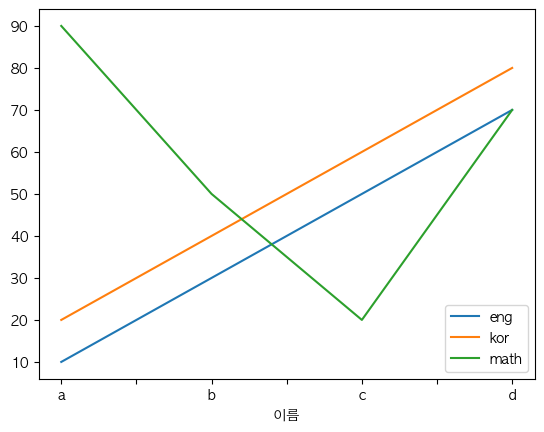

In [81]:
df.plot()
plt.show()

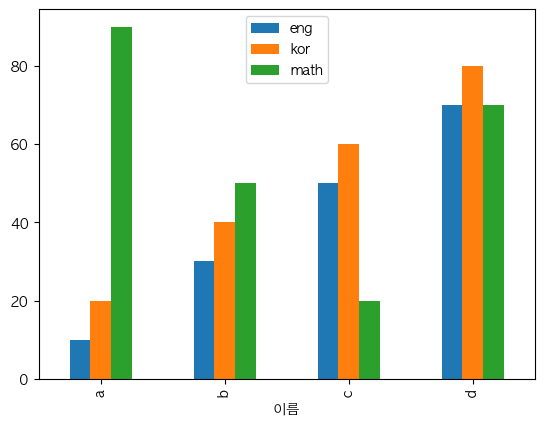

In [82]:
df.plot(kind='bar')
plt.show()

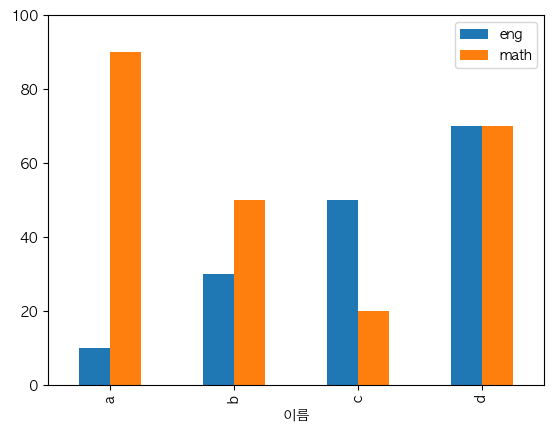

In [83]:
df.plot(kind='bar', y=['eng','math'], ylim=(0,100)) # x='kor'
plt.show()